# Sistemas de Controle I - Tarefa 1

Alunos:
* Alejo Perdomo Milar
* João Mário Carnieletto Izoton Lago

---

# Bibliotecas e imports

In [1]:
%pip install -q numpy matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

---

# Análise de um filtro passa-baixa de segunda ordem RC

<div style="text-align: center;">
    <img src="./prints/schematic.png" alt="Esquemático" width="800"/>
</div>

Dado o circuito acima, determine a função de transferência do circuito, considerando como saída a tensão no capacitor C2 (Z4).

---

## Resolução

Utilizando o teorema de Thevenin, podemos simplificar o circuito para a versão abaixo:

<div style="text-align: center;">
    <img src="./prints/thevenin_1.png" alt="Thevenin equivalente 1" width="800"/>
</div>

Onde:

$$
V_{th} = V_{s} \cdot \frac{Z_2}{Z_1 + Z_2}
$$

$$
Z_{th} = \frac{Z_1 \cdot Z_2}{Z_1 + Z_2}
$$

Combinando a série de impedâncias $Z_{th}$ e $Z_3$ ficamos com o circuito abaixo:

<div style="text-align: center;">
    <img src="./prints/thevenin_2.png" alt="Thevenin equivalente 2" width="800"/>
</div>

Logo, aplicando o divisor de tensão, temos:

$$
V_{out} = V_{th} \cdot \frac{Z_4}{(Z_{th} + Z_3) + Z_4}
$$

Expandindo a impedância $Z_{th}$:

$$
V_{out} = V_{s} \cdot \frac{Z_2}{Z_1 + Z_2} \cdot \frac{Z_4}{((\frac{Z_1 \cdot Z_2}{Z_1 + Z_2}) + Z_3) + Z_4}
$$

---

Dado o equivalente em Laplace de cada elemento do circuito:

$$
Z_1 = R1 \\
Z_2 = \frac{1}{sC_1} \\
Z_3 = R2 \\
Z_4 = \frac{1}{sC_2} \\
$$

Substituindo as impedâncias na equação de $V_{out}$:

$$
V_{out} = V_{s} \cdot \frac{\frac{1}{sC_1}}{R1 + \frac{1}{sC_1}} \cdot \frac{\frac{1}{sC_2}}{((\frac{R1 \cdot \frac{1}{sC_1}}{Z_1 + \frac{1}{sC_1}}) + R2) + \frac{1}{sC_2}}
$$

Removendo termos comuns:

$$
V_{out} = V_{s} \cdot \frac{\frac{1}{sC_1}}{R1} \cdot \frac{\frac{1}{sC_2}}{((\frac{R1 \cdot \frac{1}{sC_1}}{Z_1 + \frac{1}{sC_1}}) + R2)}
$$

Simplificando o primeiro termo:

$$
\frac{\frac{1}{sC_1}}{R_1 + \frac{1}{sC_1}}
$$

Multiplicando numerador e denominador por $sC_1$:

$$
= \frac{1}{sC_1R_1 + 1}
$$

Simplificar o denominador do segundo termo.

Expandindo:

$$
\frac{R_1 \cdot \frac{1}{sC_1}}{R_1 + \frac{1}{sC_1}}
$$

$$
= \frac{R_1}{sC_1R_1 + 1}
$$

Novo denominador:

$$
\left( \frac{R_1}{sC_1R_1 + 1} + R_2 \right) + \frac{1}{sC_2}
$$

Somando $ \frac{R_1}{sC_1R_1 + 1} + R_2 $.

Para realizar a soma, precisa-se de um denominador comum:

$$
R_2 = \frac{R_2(sC_1R_1+1)}{sC_1R_1+1}
$$

Logo:

$$
\frac{R_1}{sC_1R_1+1} + R_2 = \frac{R_1 + R_2(sC_1R_1+1)}{sC_1R_1+1}
$$

Expandindo o numerador:

$$
R_1 + R_2(sC_1R_1+1) = R_1 + sC_1R_1R_2 + R_2
$$

Assim, temos:

$$
= \frac{R_1 + R_2 + sC_1R_1R_2}{sC_1R_1+1}
$$

Somando isso com $ \frac{1}{sC_2} $.

Para somar, precisamos de um denominador comum:

Primeira fração vira:

$$
\frac{(R_1 + R_2 + sC_1R_1R_2)sC_2}{(sC_1R_1+1)(sC_2)}
$$

A segunda:

$$
\frac{sC_1R_1+1}{(sC_1R_1+1)(sC_2)}
$$

Somando:

$$
= \frac{(R_1 + R_2 + sC_1R_1R_2)sC_2 + (sC_1R_1+1)}{(sC_1R_1+1)(sC_2)}
$$

Expandindo o numerador:

$$
= sC_2(R_1 + R_2) + s^2C_1C_2R_1R_2 + sC_1R_1 + 1
$$

Agrupando termos semelhantes:

$$
= s^2C_1C_2R_1R_2 + sC_2(R_1+R_2) + sC_1R_1 + 1
$$

---

**Montando a função de transferência completa:**

Dado que $V_{out}$ era:

$$
\frac{1}{sC_1R_1+1} \times \frac{1}{sC_2}
$$

E o denominador do divisor de tensão ficou:

$$
\frac{1}{(sC_1R_1+1)(sC_2)} \left( s^2C_1C_2R_1R_2 + sC_2(R_1+R_2) + sC_1R_1 + 1 \right)
$$

O $ (sC_1R_1+1)(sC_2) $ cancela numerador e denominador.

Assim restando:

$$
\frac{V_{out}}{V_s} = \frac{1}{s^2 C_1 C_2 R_1 R_2 + s C_2 (R_1 + R_2) + s C_1 R_1 + 1}
$$

Colocando **s** em evidência obtém-se a função de transferência final:

$$
\boxed{\frac{V_{out}}{V_s} = \frac{1}{s^2 C_1 C_2 R_1 R_2 + s (C_2 R_1 + C_2 R_2 + C_1 R_1) + 1}}
$$

---

# Validação da função de transferência (Plot vs LTSpice)

## Assumindo valores para os componentes:

* R1 = 1kΩ
* R2 = 1kΩ
* C1 = 1μF
* C2 = 1μF

## Análise da resposta em frequência de $H(s)$ de 1Hz a 1MHz

---

### Plot da função de transferência (Python)

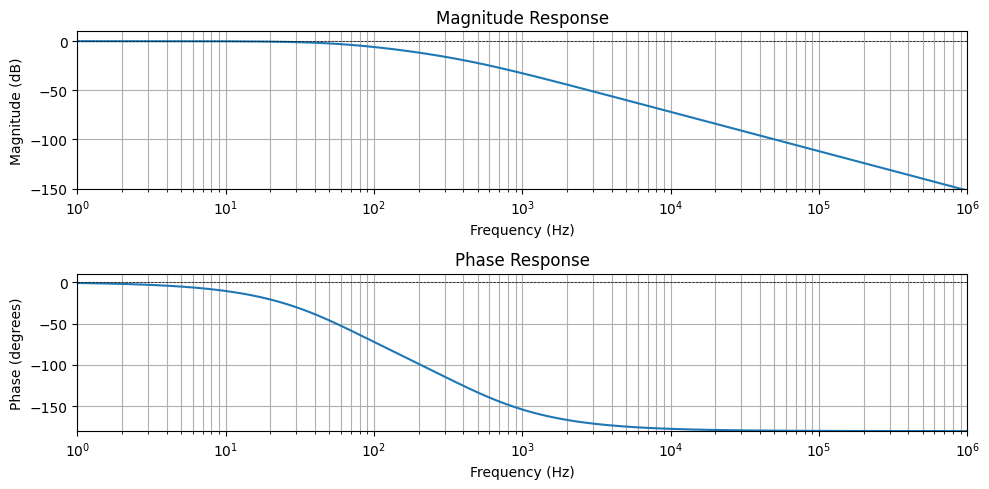

In [8]:
# Circuit parameters

r1 = 1e3    # 1 kOhm
r2 = 1e3    # 1 kOhm
c1 = 1e-6   # 1 uF
c2 = 1e-6   # 1 uF

# Plotting parameters

start_frequency_hz = 1 # 1 Hz
end_frequency_hz = 1e6 # 1 MHz

# Transfer function parameters
def transfer_function(s: float) -> float:
    return 1 / (s**2 * c1 * c2 * r1 * r2 + s * (c2 * r1 + c2 * r2 + c1 * r1) + 1)

# Generate frequency range
s = np.logspace(np.log10(start_frequency_hz), np.log10(end_frequency_hz), num=10000)
frequencies = 2 * np.pi * s
# Evaluate the transfer function
transfer_function_values = transfer_function(1j * frequencies)

# Calculate the magnitude and phase
magnitude = np.abs(transfer_function_values)
phase = np.angle(transfer_function_values)

# Plot the magnitude
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.semilogx(s, 20 * np.log10(magnitude))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(start_frequency_hz, color='red', lw=0.5, ls='--')
plt.axvline(end_frequency_hz, color='red', lw=0.5, ls='--')
plt.xlim(start_frequency_hz, end_frequency_hz)
plt.ylim(-150, 10)

# Plot the phase
plt.subplot(2, 1, 2)
plt.semilogx(s, np.degrees(phase))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.grid(which='both', axis='both')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(start_frequency_hz, color='red', lw=0.5, ls='--')
plt.axvline(end_frequency_hz, color='red', lw=0.5, ls='--')
plt.xlim(start_frequency_hz, end_frequency_hz)
plt.ylim(-180, 10)
plt.tight_layout()
plt.show()

### Plot da função de transferência (LTSpice)

Atualizando o esquemático no LTSpice para os valores assumidos:

<div style="text-align: center;">
    <img src="./prints/schematic_1.png" alt="LTSpice" width="800"/>
</div>

Realizando o Bode Plot no LTSpice para o range de frequências de 1Hz a 1MHz:

<div style="text-align: center;">
    <img src="./prints/bode_1.png" alt="LTSpice" width="1500"/>
</div>

Como pode-se observar, ambas as repostas são equivalentes, demonstrando que a função de transferência foi corretamente obtida.